In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
# Definir os tickers dos ativos
tickers = ['AAPL', 'GOOGL', 'MSFT']

In [3]:
# Definir o período
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

In [4]:
# Baixar os dados
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Salvar os dados em um arquivo CSV
    filename = f"{ticker}_data.csv"
    data.to_csv(filename)
    print(f"Dados de {ticker} salvos em {filename}")

print("Download e salvamento concluídos.")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Dados de AAPL salvos em AAPL_data.csv
Dados de GOOGL salvos em GOOGL_data.csv


[*********************100%***********************]  1 of 1 completed

Dados de MSFT salvos em MSFT_data.csv
Download e salvamento concluídos.


In [5]:
# Lista de tickers
tickers = ['AAPL', 'GOOGL', 'MSFT']

# Dicionário para armazenar os DataFrames
dfs = {}

In [6]:
# Carregar dados e calcular amplitude
for ticker in tickers:
    # Carregar dados do CSV
    df = pd.read_csv(f"{ticker}_data.csv", index_col='Date', parse_dates=True)

    # Calcular amplitude
    df['Amplitude'] = df['High'] - df['Low']

    # Armazenar DataFrame no dicionário
    dfs[ticker] = df

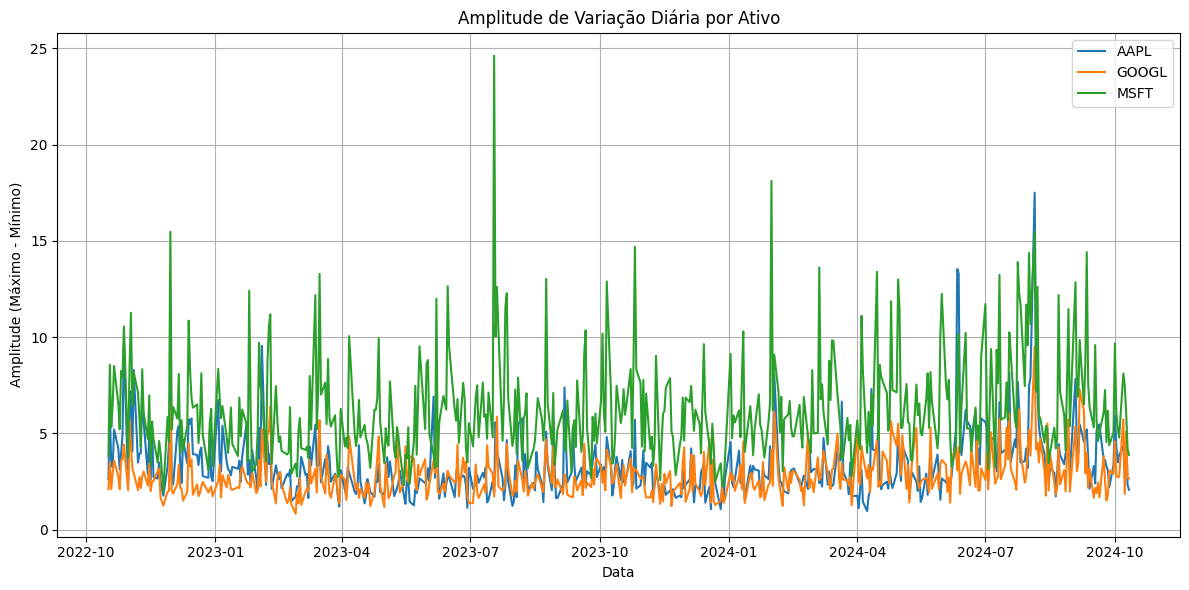

In [7]:
# Criar gráfico
plt.figure(figsize=(12, 6))

for ticker, df in dfs.items():
    plt.plot(df.index, df['Amplitude'], label=ticker)

plt.title('Amplitude de Variação Diária por Ativo')
plt.xlabel('Data')
plt.ylabel('Amplitude (Máximo - Mínimo)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
# Calcular volatilidade (desvio padrão da amplitude)
volatilidades = {ticker: df['Amplitude'].std() for ticker, df in dfs.items()}

# Identificar ativo com maior volatilidade
ativo_mais_volatil = max(volatilidades, key=volatilidades.get)

print("Volatilidade por ativo:")
for ticker, volatilidade in volatilidades.items():
    print(f"{ticker}: {volatilidade:.2f}")

print(f"\nAtivo com maior volatilidade: {ativo_mais_volatil}")

Volatilidade por ativo:
AAPL: 1.69
GOOGL: 1.13
MSFT: 2.67

Ativo com maior volatilidade: MSFT
